Use part-of-speech tagger to provide the number of verbs, nouns, adjective sand adverbs in each dataframe. Present the result in a table to summarize the result for every dataframe.  Draw wordCloud of cleaned tokens in each dataframe. You may inspire from existing implementations available in Kaggle link (see also https://github.com/amueller/word_cloud).  Discuss the consistency of the content data in each dataframe with the title of the category. (Anh)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import spacy
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
#python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')
def count_pos(text):
    doc = nlp(text)
    pos_counts = {
        'Noun': 0,
        'Verb': 0,
        'Adjective': 0,
        'Adverb': 0
    }
    for token in doc:
        if token.pos_ == 'NOUN':
            pos_counts['Noun'] += 1
        elif token.pos_ == 'VERB':
            pos_counts['Verb'] += 1
        elif token.pos_ == 'ADJ':
            pos_counts['Adjective'] += 1
        elif token.pos_ == 'ADV':
            pos_counts['Adverb'] += 1
    return pos_counts

datas = {}
for file in ['test','val','train','complete']:
    data = pd.read_csv('categories/{}.csv'.format(file))
    text_data = data['Concatenated_Tweets']
    data['POS_Counts'] = text_data.apply(count_pos)
    datas[file] = data


In [4]:
from tabulate import tabulate

def print_table_pos_tag_result(df_name):
    data = datas[df_name]
    pos_tag_result = data['POS_Counts']
    df = pd.DataFrame(list(pos_tag_result))
    df.insert(0, 'Emotion', data['Category'][df.index])
    table = tabulate(df, headers='keys', tablefmt='pretty', showindex=False)
    print("POS COUNT FOR DF {}".format(df_name))
    print(table)

for file in ['test','val','train','complete']:
    print_table_pos_tag_result(file)    
    


POS COUNT FOR DF test
+----------+------+------+-----------+--------+
| Emotion  | Noun | Verb | Adjective | Adverb |
+----------+------+------+-----------+--------+
| sadness  | 1427 | 2123 |    992    |  809   |
|   joy    | 1810 | 2385 |   1253    |  954   |
|   fear   | 494  | 755  |    437    |  320   |
|  anger   | 700  | 1003 |    491    |  378   |
|   love   | 471  | 586  |    241    |  213   |
| surprise | 177  | 238  |    131    |   89   |
+----------+------+------+-----------+--------+
POS COUNT FOR DF val
+----------+------+------+-----------+--------+
| Emotion  | Noun | Verb | Adjective | Adverb |
+----------+------+------+-----------+--------+
| sadness  | 1279 | 1934 |    899    |  728   |
|   love   | 543  | 633  |    299    |  237   |
|  anger   | 685  | 991  |    475    |  402   |
|   joy    | 1793 | 2444 |   1265    |  993   |
|   fear   | 525  | 735  |    385    |  322   |
| surprise | 179  | 269  |    147    |  112   |
+----------+------+------+-----------+-------

Summarize: ????

WORD CLOUD FOR DATA FRAME test


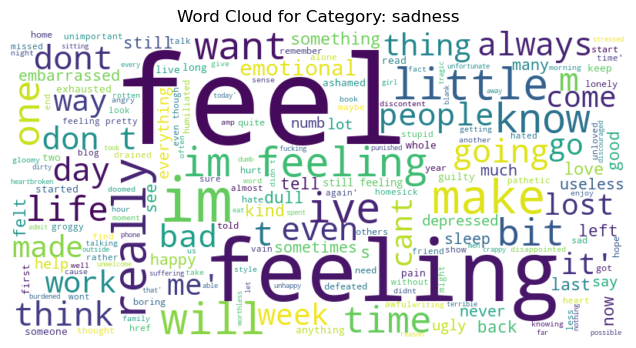

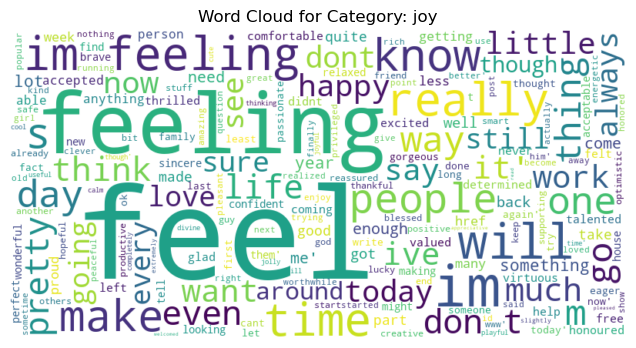

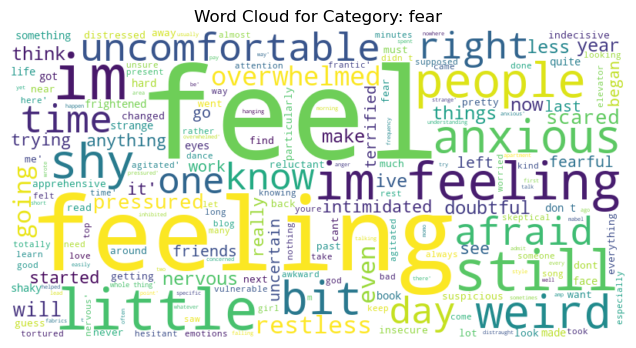

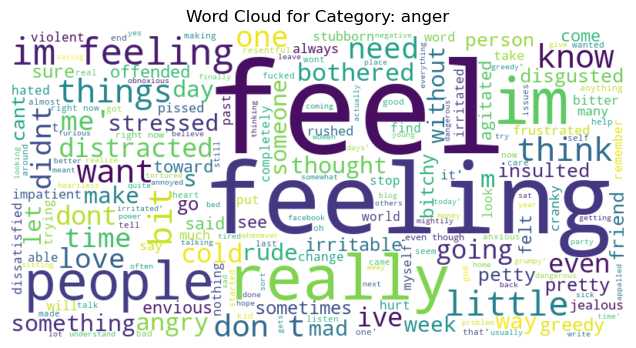

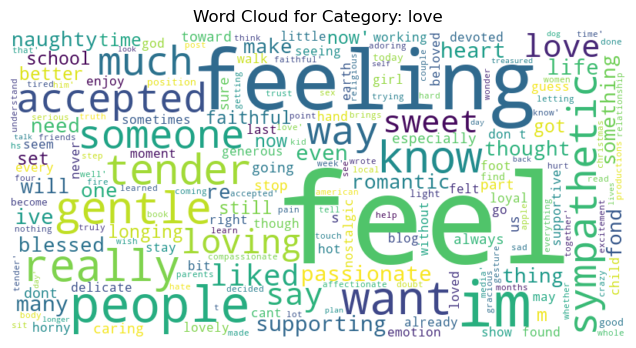

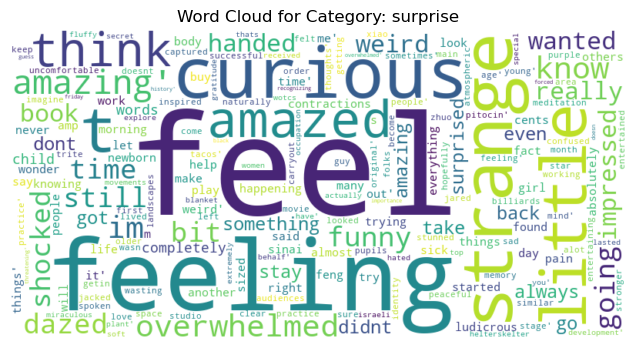

Frequency table:sadness
         Word  Frequency
0        feel   1.000000
1     feeling   0.370023
2          im   0.168618
3        make   0.088993
4      really   0.081967
5        will   0.077283
6      little   0.074941
7         ive   0.070258
8  im feeling   0.067916
9        know   0.065574
Frequency table:joy
         Word  Frequency
0        feel   1.000000
1     feeling   0.318618
2          im   0.115163
3        will   0.080614
4  im feeling   0.072937
5        time   0.071017
6      really   0.071017
7        know   0.069098
8        make   0.065259
9           s   0.063340
Frequency table:fear
         Word  Frequency
0        feel   1.000000
1     feeling   0.615385
2          im   0.146853
3      little   0.118881
4       still   0.111888
5  im feeling   0.097902
6         shy   0.083916
7      people   0.083916
8     anxious   0.076923
9       weird   0.076923
Frequency table:anger
          Word  Frequency
0         feel   1.000000
1      feeling   0.544379
2         

In [28]:
wordcloud = WordCloud(width=800, height=400, background_color='white')

df_frequence = pd.DataFrame()

def generate_word_cloud_for_data_frame(file_name):
    global df_frequence
    data = datas[file]
    categories = data['Category']
    tweets = data['Concatenated_Tweets']
    unique_categories = categories.unique()
    save_frequency_data = {}

    for category in unique_categories:
        category_tweets = ' '.join(tweets[categories == category])
        wordcloud.generate(category_tweets)
        word_frequencies = wordcloud.words_
        df = pd.DataFrame(word_frequencies.items(), columns=['Word', 'Frequency'])
        top_words = df.sort_values(by='Frequency', ascending=False).head(10)
        save_frequency_data[category] = top_words
        plt.figure(figsize=(8, 4))
        plt.title(f'Word Cloud for Category: {category}')
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.show()

    for key in save_frequency_data:
        print("Frequency table:" + key)
        print(save_frequency_data[key])


for file in ['test']:
    print("WORD CLOUD FOR DATA FRAME {}".format(file))
    generate_word_cloud_for_data_frame(file)



The verb: Feel and feeling take the majority part in the df. Following by adj that discribe emotions.
For example: <br>
Joy: good, happy, positive, able, thankful,...<br>
Fear: unsure, terrified, reluctant, hesitant, uncertain,...<br>
Surprise: curious, surprise, impressed, amazed,...<br>